# <u>Submission instructions</u>
### Submission must be in pairs, unless otherwise authorized.
#### Submit by 28/2/2024

<ul style="font-size: 17px">
<li> This notebook contains all the questions. You should follow the instructions below.</li>
<li> Solutions for both theoretical and practical parts should be written in this notebook</li>
</ul>

<h3> Moodle submission</h3>


<p style="font-size: 17px">
You should submit three files:
</p>
<ul style="font-size: 17px">
<li>IPYNB notebook:
  <ul>
  <li>All the wet and dry parts, including code, graphs, discussion, etc.</li>
  </ul>
</li>
<li>PDF file:
  <ul>
  <li>Export the notebook to PDF. Make sure that all the cells are visible.</li>
  </ul>
</li>
<li>Pickle file:
  <ul>
    <li>As requested in Q2.a</li>
  </ul>
</li>
</ul>
<p style="font-size: 17px">
All files should be in the following format: "HW1_ID1_ID2.file"
<br>
Good Luck!
</p>

<h1> Question 1</h1>

## I. Softmax Derivative (10pt)

<p style="font-size: 17px">
Derive the gradients of the softmax function and demonstrate how the expression can be reformulated solely by using the softmax function, i.e., in some expression where only $softmax(x)$, but not $x$, is present). Recall that the softmax function is defined as follows:
$$softmax(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}$$

### I. Softmax Derivative - Answer:

we will use the quotient rule: \\
$\frac{d}{dx}\left(\frac{f(x)}{g(x)}\right) = \frac{g(x)f'(x) - f(x)g'(x)}{(g(x))^2}$

such that:

$ f(x) = e^{x_i} $ \\
$ g(x) = \sum_{j=1}^{N} e^{x_j} --> \frac{d}{dx_k} g(x) = e^{x_k} $


**Split into 2 cases:**
1. $i = k$: \\
$ \frac{d}{dx_i} f(x) = e^{x_i} $ \\

$$ \frac{\partial \text{softmax}(x)_i}{\partial x_k} = \frac{e^{x_i} \sum_{j=1}^{N} e^{x_j} - e^{x_k} e^{x_i}}{\left(\sum_{j=1}^{N} e^{x_j}\right)^2} $$

$$ \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}} \cdot \left[\frac{\sum_{j=1}^{N} e^{x_j} - e^{x_k}}{\sum_{j=1}^{N} e^{x_j}}\right] $$

$$ \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}} \cdot \left[1 - \frac{e^{x_k}}{\sum_{j=1}^{N} e^{x_j}}\right] $$

$$ \text{by definition of softmax:} $$

$$ = \text{softmax}{(x)_i} \cdot [1- \text{softmax}{(x)_k}] $$
$$ = \text{softmax}{(x)_i} \cdot [1- \text{softmax}{(x)_i}] $$



2. $i \neq k$: \\
$ \frac{d}{dx_k} f(x) = 0 $ --> const, independent of ${x_k}$

$$ \frac{\partial \text{softmax}(x)_i}{\partial x_k} = \frac{0 \cdot \sum_{j=1}^{N} e^{x_j} - e^{x_k} e^{x_i}}{\left(\sum_{j=1}^{N} e^{x_j}\right)^2} $$

$$ = \frac{- e^{x_k} e^{x_i}}{\left(\sum_{j=1}^{N} e^{x_j}\right)^2} $$

$$ \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}} \cdot \left[\frac{- e^{x_k}}{\sum_{j=1}^{N} e^{x_j}}\right] $$

$$ \text{by definition of softmax:} $$

$$ = \text{- softmax}{(x)_i} \cdot \text{softmax}{(x)_k} $$

**Hence:**

$$
\frac{\partial \text{softmax}(x)_i}{\partial x_k} = \begin{cases}
\text{softmax}(x)_i \cdot (1 - \text{softmax}(x)_i) & \text{if } i = k \\
-\text{softmax}(x)_i \cdot \text{softmax}(x)_k & \text{if } i \neq k
\end{cases}
$$


## II. Cross-Entropy Gradient (10pt)
<p style="font-size: 17px">
Derive the gradient of cross-entropy loss with regard to the inputs of a softmax function. i.e., find the gradients with respect to the softmax input vector $\theta$, when the prediction is denoted by $\hat{y} = softmax(\theta)$. Remember the cross entropy function is:
$$CE(y, \hat{y}) = -\sum_i y_i log(\hat{y_i})$$


<p style="font-size: 17px">where $y$ is the one-hot label vector, and $\hat{y}$ is the predicted probability vector for all classes.

### II. Cross-Entropy Gradient - Answer

$$ \frac{\partial \text{CE}(y, \hat{y})}{\partial \theta} = -\sum_{i} y_i \cdot \frac{\partial \log(\hat{y}_i)}{\partial \theta} $$

$$ \text{chain rule:} $$

$$ = -\sum_{i} y_i \cdot \frac{\partial \log(\hat{y}_i)}{\partial \hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial \theta} $$

$$ = -\sum_{i} y_i \cdot \frac{1}{\hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial \theta} $$

$$ = -\sum_{i} \frac{y_i}{\hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial \theta} $$

$$ \text{such that: } \frac{\partial \hat{y}_i}{\partial \theta} \text{ is the softmax derivative we previously found: } $$

$$
\frac{\partial \hat{y}_i}{\partial \theta} = \begin{cases}
\hat{y}_i \cdot (1 - \hat{y}_i) & \text{if } i = k \\
-\hat{y}_i \cdot \hat{y}_k & \text{if } i \neq k
\end{cases}
$$

$$ \frac{\partial \text{CE}(y, \hat{y})}{\partial \theta} = -\sum_{i = k} \frac{y_i}{\hat{y}_i} \cdot \hat{y}_i \cdot (1 - \hat{y}_i) -\sum_{i \neq k} \frac{y_i}{\hat{y}_i} \cdot (-\hat{y}_i \cdot \hat{y}_k) $$

$$ = -{y_k} \cdot (1 - \hat{y}_k) + \sum_{i \neq k} {y_i} \cdot \hat{y}_k $$
$$ = -{y_k} + {y_k} \cdot \hat{y}_k + \sum_{i \neq k} {y_i} \cdot \hat{y}_k $$

$$ = -{y_k} + \sum_{i} {y_i} \cdot \hat{y}_k $$

$$ = -{y_k} + \hat{y}_k \cdot \sum_{i} {y_i} $$


$$ \sum_{i} {y_i} = 1 , \text{y is one-hot vector} $$

**Hence:**

$$ \frac{\partial \text{CE}(y, \hat{y})}{\partial \theta} = \hat{y}_k -{y_k}$$

# Question 2

## I. Derivative Of Activation Functions (10pt)

> Indented block



<p style="font-size: 17px">
The following cell contains an implementation of some activation functions. Implement the corresponding derivatives.</p>

In [1]:
import torch

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))


def tanh(x):
    return torch.div(torch.exp(x) - torch.exp(-x), torch.exp(x) + torch.exp(-x))


def softmax(x):
    exp_x = torch.exp(x.T - torch.max(x, dim=-1).values).T  # Subtracting max(x) for numerical stability
    return exp_x / exp_x.sum(dim=-1, keepdim=True)

In [2]:
def d_sigmoid(x):
    # x: sigmoid output
    return x * (1 - x)

def d_tanh(x):
    # x: tanh output
    return 1 - x * x

def d_softmax(x):
    # x: softmax output
    #return x * (1 - x)
    n = x.size(-1)
    softmax_matrix = x.unsqueeze(-1) * (torch.eye(n) - x.unsqueeze(-2))
    return softmax_matrix.sum(dim=-1)

## II. Train a Fully Connected network on MNIST (30pt)

<p style="font-size: 17px">In the following exercise, you will create a classifier for the MNIST dataset.
You should write your own training and evaluation code and meet the following
constraints:
<ul>
<li> You are only allowed to use torch tensor manipulations.</li>
<li> You are NOT allowed to use:
  <ul>
  <li> Auto-differentiation - backward()</li>
  <li> Built-in loss functions</li>
  <li> Built-in activations</li>
  <li> Built-in optimization</li>
  <li> Built-in layers (torch.nn)</li>
  </ul>
  </li>
</ul>
</h4>

<p style="font-size: 17px">
 a) The required classifier class is defined.
<ul style="font-size: 17px">
<li> You should implement the backward pass of the model.
<li> Train the model and plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li> You should save the model's weights and biases. Change the student_ids to yours.
</ul>
<p style="font-size: 17px">In this section, you <b>must</b> use the "set_seed" function with the given seed and <b>sigmoid</b> as an activation function.
</p>

In [3]:
import torch
import torchvision
from torch.utils.data import DataLoader

import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Constants
SEED = 42
EPOCHS = 16
BATCH_SIZE = 32
NUM_OF_CLASSES = 10

# Setting seed
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)


# Transformation for the data
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torch.flatten])


# Cross-Entropy loss implementation
def one_hot(y, num_of_classes=10):
    hot = torch.zeros((y.size()[0], num_of_classes))
    hot[torch.arange(y.size()[0]), y] = 1
    return hot

def cross_entropy(y, y_hat):
    return -torch.sum(one_hot(y) * torch.log(y_hat)) / y.size()[0]

C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
# Create dataloaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)


test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE,)

In [5]:
class FullyConnectedNetwork:
    def __init__(self, input_size, output_size, hidden_size1, activiation_func, lr=0.01):
        # parameters
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size1 = hidden_size1

        # activation function
        self.activation_func = activiation_func

        # weights
        self.W1 = torch.randn(self.input_size, self.hidden_size1)
        self.b1 = torch.zeros(self.hidden_size1)

        self.W2 = torch.randn(self.hidden_size1, self.output_size)
        self.b2 = torch.zeros(self.output_size)

        self.lr = lr

    def forward(self, x): # added self to z1,h1,z2 - to use in backward function
        self.z1 = torch.matmul(x, self.W1) + self.b1
        self.h1 = self.activation_func(self.z1)
        self.z2 = torch.matmul(self.h1, self.W2) + self.b2
        y_hat = softmax(self.z2)
        return y_hat

    def backward(self, x, y, y_hat):
        batch_size = y.size(0)
        #dloss_dyhat = (1/batch_size)* (y_hat-y)

        dloss_dz2 = (1/batch_size)* (y_hat-y)
        dloss_dw2 = torch.matmul(torch.t(self.h1), dloss_dz2)
        dloss_db2 = torch.matmul(torch.t(dloss_dz2), torch.ones(batch_size))

        dloss_dh1 = torch.matmul(dloss_dz2, torch.t(self.W2))
        dloss_dz1 = dloss_dh1 * d_sigmoid(self.h1)

        dloss_dw1 = torch.matmul(torch.t(x), dloss_dz1)
        dloss_db1 =torch.matmul(torch.t(dloss_dz1), torch.ones(batch_size))

        self.W2 = self.W2 - self.lr * dloss_dw2
        self.b2 = self.b2 - self.lr * dloss_db2
        self.W1 = self.W1 - self.lr * dloss_dw1
        self.b1 = self.b1 -  self.lr * dloss_db1

        


In [6]:
set_seed(SEED)
model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=0.01)

In [7]:

train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(EPOCHS):

    # Training
    epoch_train_loss = 0.0
    correct_train_predictions = 0
    total_train_samples = 0

    for (inputs, labels) in train_dataloader:
        y_hat = model.forward(inputs)
        model.backward(inputs, one_hot(labels), y_hat)

        epoch_train_loss += cross_entropy(labels, y_hat).item()

        _, predicted_labels = torch.max(y_hat, 1)
        correct_train_predictions += (predicted_labels == labels).sum().item()
        total_train_samples += labels.size(0)

    train_accuracy.append(correct_train_predictions / total_train_samples)
    train_loss.append(epoch_train_loss / len(train_dataloader))

    # Testing
    epoch_test_loss = 0.0
    correct_test_predictions = 0
    total_test_samples = 0

    with torch.no_grad():
        for (test_inputs, test_labels) in test_dataloader:
            test_y_hat = model.forward(test_inputs)
            epoch_test_loss += cross_entropy(test_labels, test_y_hat).item()

            _, predicted_labels = torch.max(test_y_hat, 1)
            correct_test_predictions += (predicted_labels == test_labels).sum().item()
            total_test_samples += test_labels.size(0)

    test_accuracy.append(correct_test_predictions / total_test_samples)
    test_loss.append(epoch_test_loss / len(test_dataloader))

    # Print or log the results if needed
    #print(f"Epoch {epoch + 1}/{EPOCHS} - Train Loss: {train_loss[-1]}, Train Accuracy: {train_accuracy[-1]}, Test Loss: {test_loss[-1]}, Test Accuracy: {test_accuracy[-1]}")

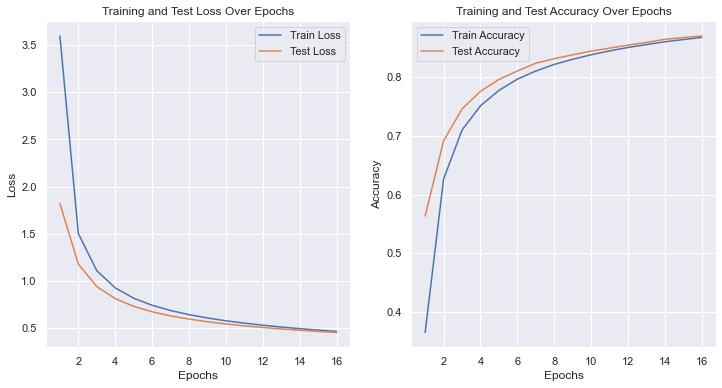

In [8]:
# Plot the accuracy and loss as a function of the epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), train_loss, label='Train Loss')
plt.plot(range(1, EPOCHS + 1), test_loss, label='Test Loss')
plt.title('Training and Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, EPOCHS + 1), test_accuracy, label='Test Accuracy')
plt.title('Training and Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [9]:
students_ids = "318862323_206418642"
torch.save({"W1": model.W1, "W2": model.W2, "b1": model.b1, "b2": model.b2}, f"HW1_{students_ids}.pkl")

<p style="font-size: 17px"> b) Train the model with various learning rates (at least 3).
<ul style="font-size: 17px">
<li> Plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li>Discuss the differences in training with different learning rates. Support your answer with plots.

In [10]:
# Use this:

learning_rates = [0.01, 0.1, 1]

train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for lr in learning_rates:
    train_loss = []
    train_accuracy = []
    test_loss = []
    test_accuracy = []
    
    
    
    set_seed(SEED)
    model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=lr)

    
    
    for epoch in range(EPOCHS):

        # Training
        epoch_train_loss = 0.0
        correct_train_predictions = 0
        total_train_samples = 0

        for (inputs, labels) in train_dataloader:
            y_hat = model.forward(inputs)
            model.backward(inputs, one_hot(labels), y_hat)

            epoch_train_loss += cross_entropy(labels, y_hat).item()

            _, predicted_labels = torch.max(y_hat, 1)
            correct_train_predictions += (predicted_labels == labels).sum().item()
            total_train_samples += labels.size(0)

        train_accuracy.append(correct_train_predictions / total_train_samples)
        train_loss.append(epoch_train_loss / len(train_dataloader))

        # Testing
        epoch_test_loss = 0.0
        correct_test_predictions = 0
        total_test_samples = 0

        with torch.no_grad():
            for (test_inputs, test_labels) in test_dataloader:
                test_y_hat = model.forward(test_inputs)
                epoch_test_loss += cross_entropy(test_labels, test_y_hat).item()

                _, predicted_labels = torch.max(test_y_hat, 1)
                correct_test_predictions += (predicted_labels == test_labels).sum().item()
                total_test_samples += test_labels.size(0)

        test_accuracy.append(correct_test_predictions / total_test_samples)
        test_loss.append(epoch_test_loss / len(test_dataloader))

        # Print or log the results if needed
        #print(f"Epoch {epoch + 1}/{EPOCHS} - Train Loss: {train_loss[-1]}, Train Accuracy: {train_accuracy[-1]}, Test Loss: {test_loss[-1]}, Test Accuracy: {test_accuracy[-1]}")
    
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)


# plot of the accuracies and the losses of the train and test sets as a function of epoch:

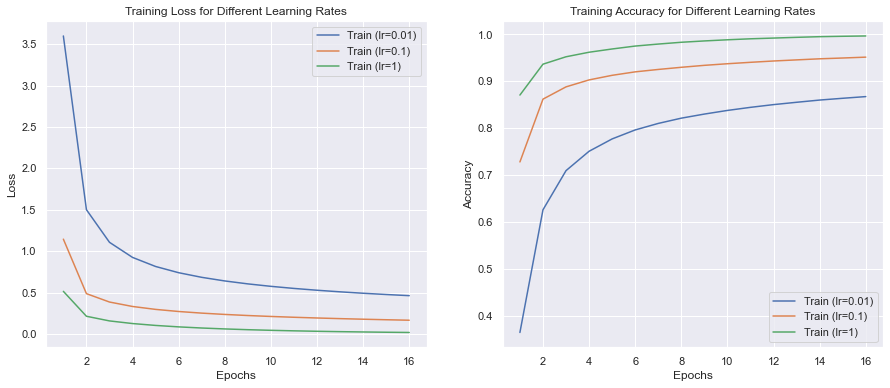

In [11]:
plt.figure(figsize=(15, 6))

epochs_range = range(1, EPOCHS + 1)

# training loss
plt.subplot(1, 2, 1)
for i, lr in enumerate(learning_rates):
    plt.plot(epochs_range, train_losses[i], label=f'Train (lr={lr})')

plt.title('Training Loss for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
for i, lr in enumerate(learning_rates):
    plt.plot(epochs_range, train_accuracies[i], label=f'Train (lr={lr})')

plt.title('Training Accuracy for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()



plt.show()

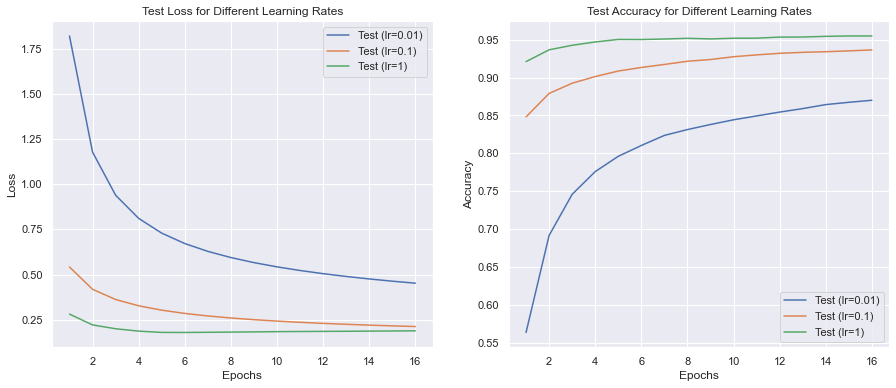

In [12]:
plt.figure(figsize=(15, 6))

# training loss
plt.subplot(1, 2, 1)
for i, lr in enumerate(learning_rates):
    plt.plot(epochs_range, test_losses[i], label=f'Test (lr={lr})')

plt.title('Test Loss for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
for i, lr in enumerate(learning_rates):
    plt.plot(epochs_range, test_accuracies[i], label=f'Test (lr={lr})')

plt.title('Test Accuracy for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()



plt.show()

# **discussion:**

as we can see, as we can see in the plot above, when we use larger learning rate, we get better results - higher accuracy and lower loss. That is, because our train set is too small, so if we will use a small learning rate, the model parameters are updated very slowly, and we will have to run a lot of epoch in order to reach a good solution. A bigger learning rate will help us update the model better.

# Question 3

## I. Implement and Train a CNN (30pt)

<p style="font-size: 17px"> You are a data scientist at a supermarket. Your manager asked you to write a new image classifiaction algorithem for the self checkout cashiers. The images are of products from your grocery store (dataset files are attched in the Moodle).
<br>
Your code and meet the following constraints:
<ul style="font-size: 17px">
<li> Your classifier must be CNN based</li>
<li> You are not allowed to use any pre-trained model</li>
</ul>
<br>
<p style="font-size: 17px">
In order to satisfy your boss you have to reach 65% accuracy on the test set. You will get a bonus for your salary (and 10 points to your grade) if your model's number of paramters is less than 100K. You can reutilize code from the tutorials.

<ul style="font-size: 17px">
<li>Train the model and plot the model's accuracy and loss (both on train and validation sets) as a function of the epochs. </li>
<li>Report the test set accurecy.</li>
<li>Discus the progress you made and describe your final model.</li>

In [13]:
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt


# Hyper parameters
num_epochs = 30
batch_size = 150
learning_rate = 0.0005
target_size = (264, 264)

In [14]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 21, kernel_size=3, padding=1),  # 3- channels (RGB), 21- the output has 8 channels,
            nn.BatchNorm2d(21),  # input channels are the output channels from prev layer- 21
            nn.ReLU(),
            nn.MaxPool2d(4))  # lower dimension times 4 (64, 64)
        self.layer2 = nn.Sequential(
            nn.Conv2d(21, 42, kernel_size=3, padding=1),
            nn.BatchNorm2d(42),
            nn.ReLU(),
            nn.MaxPool2d(4))  # lower dimension times 4 (16, 16)
        self.layer3 = nn.Sequential(
            nn.Conv2d(42, 84, kernel_size=3, padding=1),
            nn.BatchNorm2d(84),
            nn.ReLU(),
            nn.MaxPool2d(4))  # lower dimension times 4 (4, 4)
        self.fc = nn.Linear(4 * 4 * 84, 43)  # 43 labels
        self.dropout = nn.Dropout(p=0.5)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        out = self.fc(out)
        return self.logsoftmax(out)

In [15]:
# build model, define loss and optimizer
cnn = CNN()

if torch.cuda.is_available():
    cnn = cnn.cuda()

# Loss and Optimizer
weight_decay = (5e-5)

criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate, weight_decay=1e-2)
print('number of parameters: ', sum(param.numel() for param in cnn.parameters()))

# Image Preprocessing
transform = transforms.Compose([
    transforms.Resize(target_size),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.247, 0.2434, 0.2615)),
])


mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Image Preprocessing
transform = transforms.Compose([
    transforms.Resize(target_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])


# Load class labels from CSV
classes = pd.read_csv("GroceryStoreDataset\classes.csv")

number of parameters:  98533


In [16]:
def int_to_str_label(classes, pred_int_lst):
    pred_str_lst = []
    for pred_int in pred_int_lst:
        pred_str = classes[classes['Coarse Class ID (int)'] == pred_int]['Coarse Class Name (str)'].iloc[0]
        pred_str_lst.append(pred_str)
    return pred_str_lst


In [17]:


# Data Preprocessing
def load_data(file_path):
    images = []
    labels = []
    full_file_path = os.path.join("GroceryStoreDataset", file_path)
    with open(full_file_path, "r") as file:
        for line in file:
            image_path, label_idx = line.strip().split(",")
            full_image_path = os.path.join("GroceryStoreDataset", image_path)
            image = Image.open(full_image_path)
            image = transform(image)
            images.append(image)
            labels.append(int(label_idx))
    return images, labels

In [18]:
# Upload input data
train_images, train_labels = load_data("train.txt")
test_images, test_labels = load_data("test.txt")
val_images, val_labels = load_data("val.txt")

In [19]:
def create_dataloader(images, labels):
    # Convert the lists to tensors
    images = torch.stack(images)
    labels = torch.tensor(labels)
    # Create a TensorDataset from the image tensors and labels
    dataset = TensorDataset(images, labels)
    # Create a DataLoader to iterate over the dataset in batches
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataset, dataloader

In [20]:
# Create train & test data_loaders:
train_dataset, train_dataloader = create_dataloader(train_images, train_labels)
test_dataset, test_dataloader = create_dataloader(test_images, test_labels)
val_dataset, val_dataloader = create_dataloader(val_images, val_labels)

In [21]:
# Create empty lists to store the accuracy and loss values for the train and validation sets
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training loop for CNN model
max_accuracy_val = 0
for epoch in range(num_epochs):
    # Train the model
    cnn.train()  # Set the model to training mode
    total_loss_train = 0
    total_correct_train = 0
    total_train = 0
    train_predictions = []
    for images, labels in train_dataloader:
        # Forward pass
        outputs_train = cnn(images)
        loss_train = criterion(outputs_train, labels)
        total_loss_train += loss_train.item()

        # Backward pass
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs_train.data, 1)
        train_str_pred = int_to_str_label(classes, predicted.tolist())
        train_predictions.extend(train_str_pred)
        total_train += labels.size(0)
        total_correct_train += (predicted == labels).sum().item()

    # Calculate average loss and accuracy for the train set in this epoch
    train_loss_epoch = total_loss_train / len(train_dataloader)
    train_accuracy_epoch = total_correct_train / total_train
    train_losses.append(train_loss_epoch)
    train_accuracies.append(train_accuracy_epoch)

    # Validate the model
    cnn.eval()  # Set the model to evaluation mode
    total_loss_val = 0
    total_correct_val = 0
    total_val = 0
    val_predictions = []
    with torch.no_grad():
        for images, labels in val_dataloader:
            if torch.cuda.is_available():
                images = images.cuda()
                labels = labels.cuda()

            # Forward pass
            outputs_val = cnn(images)
            loss_val = criterion(outputs_val, labels)
            total_loss_val += loss_val.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs_val.data, 1)
            val_str_pred = int_to_str_label(classes, predicted.tolist())
            val_predictions.extend(val_str_pred)
            total_val += labels.size(0)
            total_correct_val += (predicted == labels).sum().item()

    # Calculate average loss and accuracy for the validation set
    val_loss_epoch = total_loss_val / len(val_dataloader)
    val_accuracy_epoch = total_correct_val / total_val
    val_losses.append(val_loss_epoch)
    val_accuracies.append(val_accuracy_epoch)

    if val_accuracy_epoch > max_accuracy_val:
        max_accuracy_val = val_accuracy_epoch
        torch.save(cnn.state_dict(), 'best_cnn.pth')

    # Print the results for the current epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss_epoch:.4f}, Train Accuracy: {train_accuracy_epoch* 100:.2f}%, '
          f'Validation Loss: {val_loss_epoch:.4f}, Validation Accuracy: {val_accuracy_epoch* 100:.2f}%')


The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
Epoch [1/30], Train Loss: 3.3430, Train Accuracy: 15.76%, Validation Loss: 3.0308, Validation Accuracy: 21.62%
Epoch [2/30], Train Loss: 2.5463, Train Accuracy: 27.31%, Validation Loss: 2.5274, Validation Accuracy: 31.42%
Epoch [3/30], Train Loss: 2.0990, Train Accuracy: 37.65%, Validation Loss: 2.2982, Validation Accuracy: 34.80%
Epoch [4/30], Train Loss: 1.8122, Train Accuracy: 44.55%, Validation Loss: 2.1886, Validation Accuracy: 38.85%
Epoch [5/30], Train Loss: 1.5696, Train Accuracy: 50.87%, Validation Loss: 1.9863, Validation Accuracy: 45.95%
Epoch [6/30], Train Loss: 1.3741, Train Accuracy: 57.77%, Validation Loss: 1.9006, Validation Accuracy: 48.31%
Epoch [7/30], Train Loss: 1.1931, Train Accuracy: 64.96%, Validation Loss: 1.9328, Validation Accuracy: 44.59%
Epoch [8/30], Train Loss: 1.0600, Train Accuracy: 69.73%, Validation Loss: 1.7741, Validati

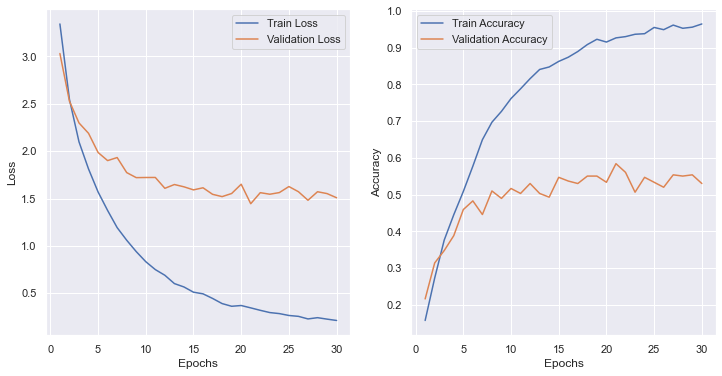

In [22]:
# Plot the accuracy and loss as a function of the epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [23]:
# Test Set
cnn.load_state_dict(torch.load('best_cnn.pth'))
cnn.eval()

CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 21, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(21, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(21, 42, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(42, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(42, 84, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1344, out_features=43, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (logsoftmax): 

In [24]:
test_predictions = []
total_correct_test = 0
total_test = 0
with torch.no_grad():  # Disable gradient computation to speed up the process
    for images, labels in test_dataloader:
        # Forward pass
        outputs_test = cnn(images)

        # Calculate the number of correct predictions in the current batch
        _, predicted = torch.max(outputs_test.data, 1)
        test_str_pred = int_to_str_label(classes, predicted.tolist())
        test_predictions.extend(test_str_pred)

        total_correct_test += (predicted == labels).sum().item()

        # Update the total number of samples
        total_test += labels.size(0)

# Calculate the test set accuracy
test_accuracy = total_correct_test / total_test

# Print the test set accuracy
print(f'Test Set Accuracy: {test_accuracy * 100:.2f}%')

Test Set Accuracy: 65.31%


**The progress:**


At first, we used the implementation of the CNN model from the tutorial.<br>
After we wrote all the training, validation and test parts, we started to change the model, adding layers, changing the output channels etc'.<br>
In addition, we changed the hyper parameters and added a regularization component to try and improve our model to achieve better results on the test set.



**Description of our final model:**

<br>
The final model is CNN with 3 convolutional layers followed by max-pooling and batch normalization.<br>
1- The first convolutional layer takes 3 input channels (RGB images) and produces 21 output channels, followed by a 4x4 max-pooling operation.<br>
2- The second convolutional layer takes the 21 output channels from the previous layer and produces 42 output channels, followed by another 4x4 max-pooling operation.<br>
3- The third convolutional layer takes the 42 output channels from the second layer and produces 84 output channels, followed by a final 4x4 max-pooling operation.<br>
4- The output of the last convolutional layer is flattened and fed into a fully connected layer with 43 output units (corresponding to the number of classes), followed by a dropout layer with a dropout rate of 0.5.<br>
5- The final output is passed through a LogSoftmax activation function to generate the predicted probabilities for each class.

## II. Analyzing a Pre-trained CNN (Filters) (10pt)

In this part, you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

You can use the following transform to normalize:

<code>normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])</code>
<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>


1. Load a pre-trained VGG16 with PyTorch using torchvision.models.vgg16(pretrained=True, progress=True, **kwargs) (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (<code>model.eval()</code>).

2. Load the images in the 'birds' folder and display them.

3. Pre-process the images to fit VGG16's architecture. What steps did you take?

4. Feed the images (forward pass) to the model. What are the outputs?

5. Choose an image of a dog in the 'dogs' folder, display it and feed it to network. What are the outputs?

6. For the first 3 filters in the first layer of VGG16, plot the filters, and then plot their response (their output) for the image from question 5. Explain your observations.

#### Q3.P2.(1+ 3) Load pre-traind VGG16 model & pre-process the images

In [25]:
import random as rnd
import torch
import torchvision.models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os


# Pre-process the images to fit VGG16's architecture
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the pre-trained VGG16 model
model = torchvision.models.vgg16(pretrained=True, progress=True)


C:\Users\USER\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#### Pre-process of  the images:
_______________


#### Q3.P2.2 Birds images load & Display

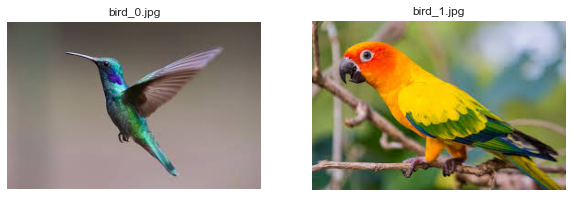

In [26]:
images_names_birds = os.listdir('birds')

fig, axes = plt.subplots(nrows=1, ncols=len(images_names_birds), figsize=(10, 5))

birds_images = []
images = []
for i, image_name in enumerate(images_names_birds):
    image_path = f'birds/{image_name}'
    image = Image.open(image_path)  # upload
    images.append(image)

    # Display the image
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title(image_name)

    image = transform(image)  # convert to tensor
    birds_images.append(image)  # store

plt.show()

#### Q3.P2.4 Forward pass

In [27]:
# Concatenate all the images tensors to a single batch
batch_images_tensor = torch.stack(birds_images)

# Set the model to evaluation mode
model.eval()

outputs = model(batch_images_tensor)  # Forward pass
print(outputs.shape)


_, predicted = torch.max(outputs.data, 1)

for i, image_name in enumerate(images_names_birds):
    print(f'{image_name}: pred label {predicted[i].item()}')

torch.Size([2, 1000])
bird_0.jpg: pred label 94
bird_1.jpg: pred label 90


#### Q3.P2.5 Dog image

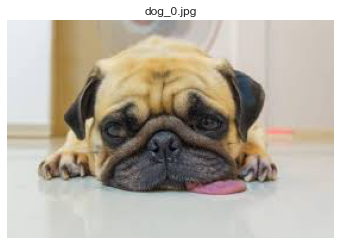

In [28]:
# '5' - dogs
images_names_dogs = os.listdir('dogs')

random_dog_image_name = rnd.choice(images_names_dogs)

random_dog_image_path = f'dogs/{random_dog_image_name}'
random_dog_image = Image.open(random_dog_image_path)

plt.imshow(random_dog_image)
plt.axis('off')
plt.title(random_dog_image_name)
plt.show()

In [29]:
dog_image_tensor = transform(random_dog_image)
dog_image_tensor = dog_image_tensor.unsqueeze(0) # Add batch dimension

model.eval()
output = model(dog_image_tensor)  # Forward pass

print(output.shape)  # tensor of size 1000 (the probabilities)
_, predicted = torch.max(output.data, 1)
print(f'{random_dog_image_name}: pred label: {predicted.item()}')

torch.Size([1, 1000])
dog_0.jpg: pred label: 254


#### Q3.P2.6 Plot of filters & Response

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


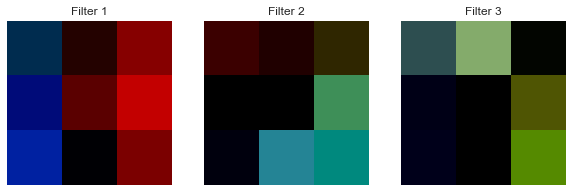

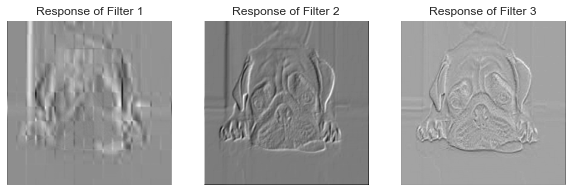

In [30]:
first_layer = model.features[0]  # Get the first layer of the model
filters = first_layer.weight[:3]  # Get the 3 first filters

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
# Plot the filters
for i in range(3):
    filter_i = filters[i].detach().numpy()
    axes[i].imshow(filter_i.transpose(1, 2, 0))
    axes[i].axis('off')
    axes[i].set_title(f'Filter {i+1}')
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
# Plot the responses of the filters
with torch.no_grad():
    output = first_layer(dog_image_tensor)
    output = output.squeeze(0)  # Add batch dimension
    for i in range(3):
        axes[i].imshow(output[i].numpy(), cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Response of Filter {i+1}')
    plt.show()

**EXPLANAITION:**<br>
The plots of the responses show the areas in the image where the filters have high activations. Darker areas indicate higher activation values. Those activations represent the features that the filters are detecting in the image. It seems like those responses are more sensitive to low-level features such as edges and textures.